In [3]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Data Cleaning

In [51]:
df["SkinThickness"] = df["SkinThickness"].replace(0, df["SkinThickness"].mean())

In [52]:
df["Insulin"] = df["Insulin"].replace(0, df["Insulin"].mean())

### Data Visualization

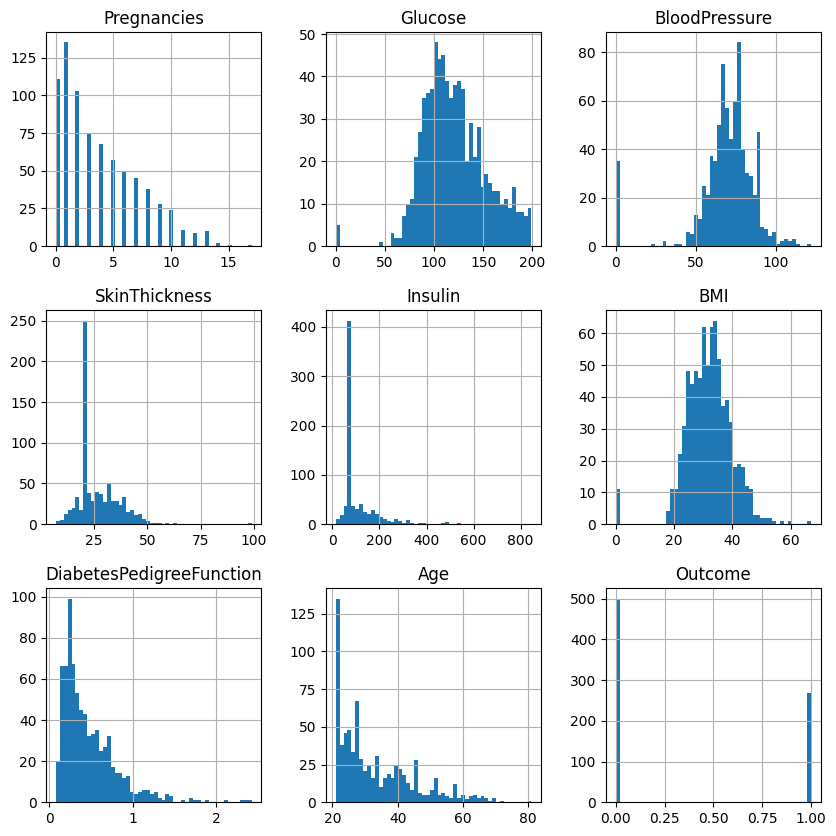

In [45]:
df.hist(figsize=(10,10),bins=50)
plt.show()

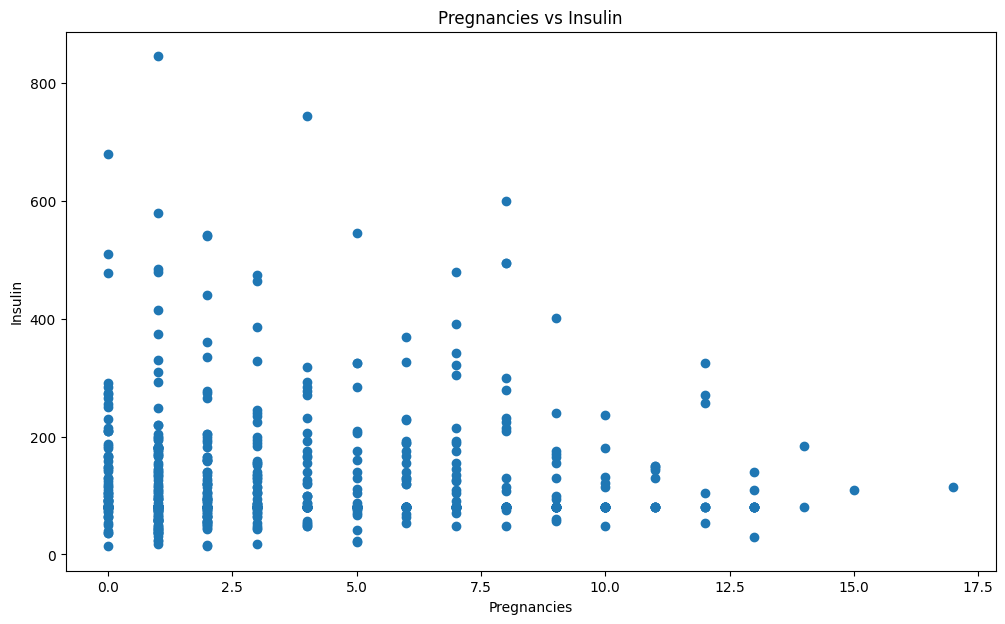

In [15]:
plt.figure(figsize= (12, 7))
plt.scatter("Pregnancies","Insulin", data = df)
plt.title("Pregnancies vs Insulin")
plt.xlabel("Pregnancies")
plt.ylabel("Insulin")
plt.show()

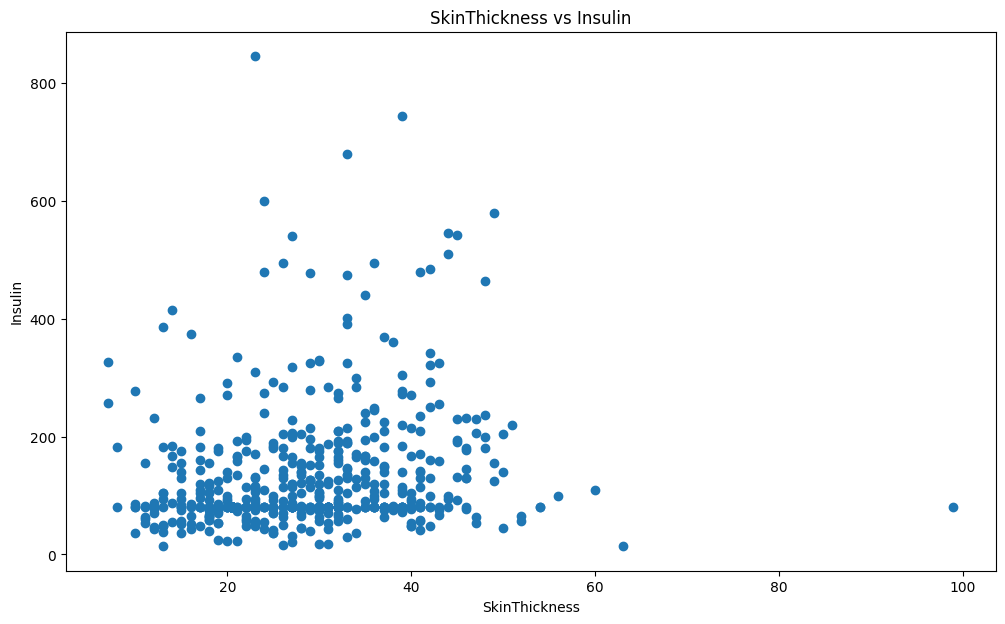

In [16]:
plt.figure(figsize= (12, 7))
plt.scatter("SkinThickness","Insulin", data = df)
plt.title("SkinThickness vs Insulin")
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()

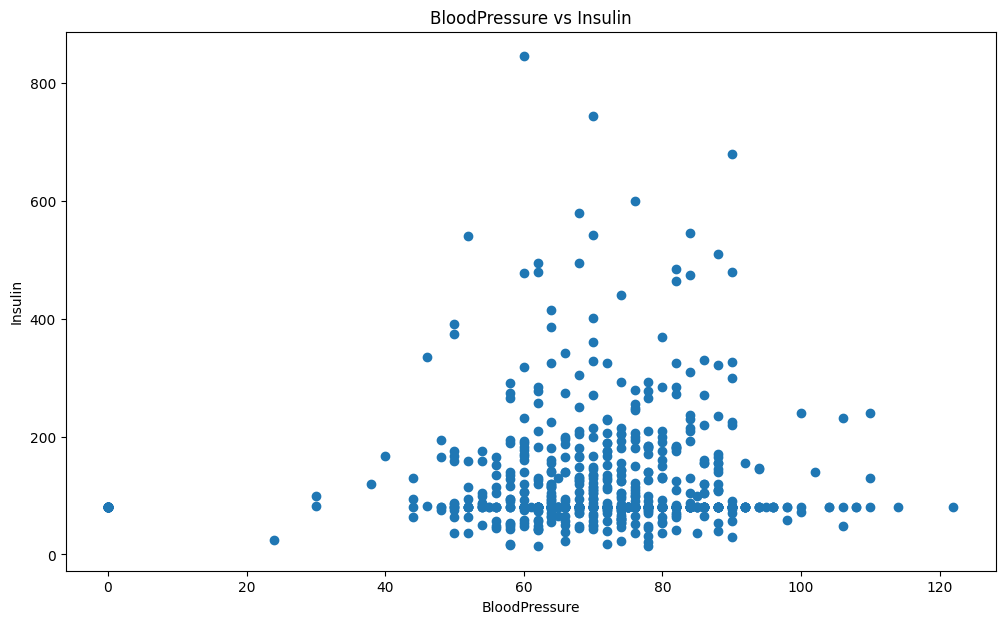

In [17]:
plt.figure(figsize= (12, 7))
plt.scatter("BloodPressure","Insulin", data = df)
plt.title("BloodPressure vs Insulin")
plt.xlabel("BloodPressure")
plt.ylabel("Insulin")
plt.show()

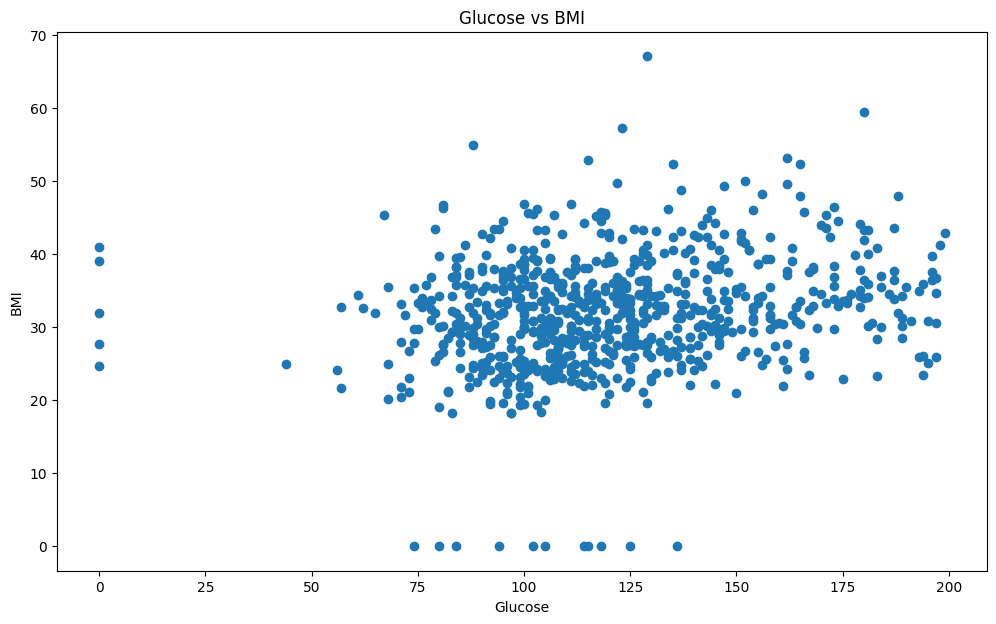

In [19]:
plt.figure(figsize= (12, 7))
plt.scatter("Glucose","BMI", data = df)
plt.title("Glucose vs BMI")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.show()

In [28]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

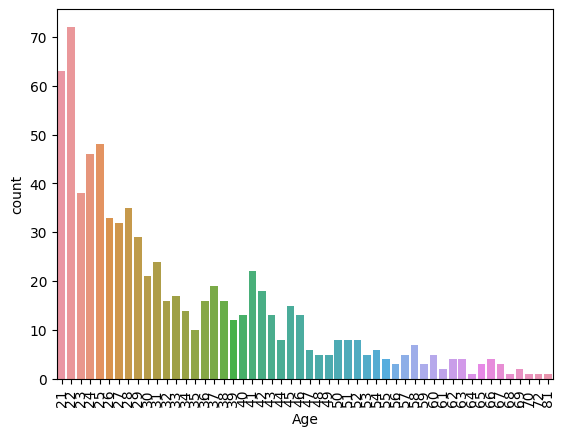

In [37]:
sns.countplot(data=df,  x='Age')
plt.xticks(rotation=90)
plt.show()

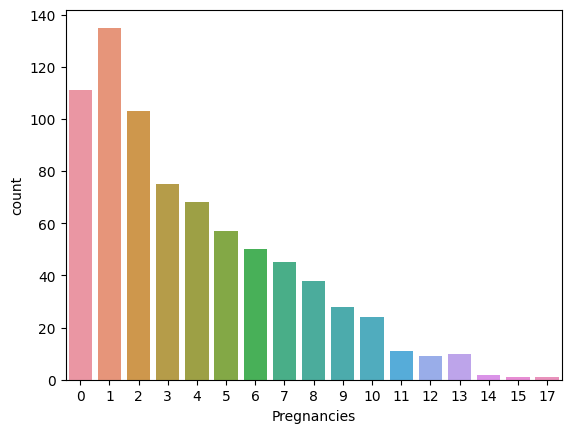

In [36]:
sns.countplot(data=df, x='Pregnancies')
plt.show()

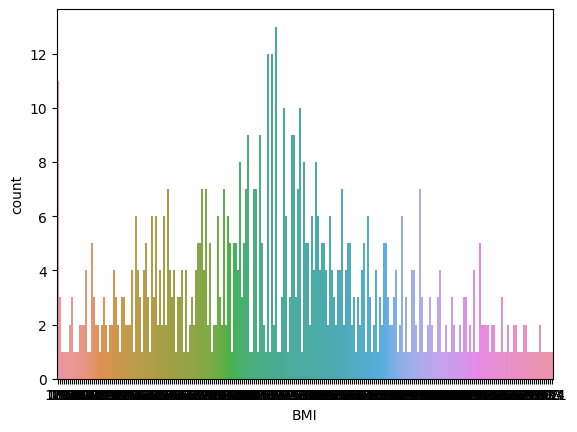

In [33]:
sns.countplot(data=df, x='BMI',)
plt.show()

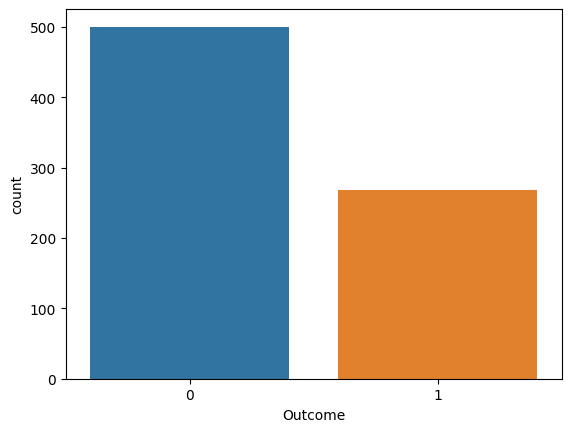

In [29]:
sns.countplot(data=df, x='Outcome')
plt.show()

### Logistic Regression


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [47]:
X_train, X_test, y_train, y_test = train_test_split(df[['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction','Age']], df['Outcome'], test_size=0.2, random_state=42)


In [48]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\Users\naray\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [50]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 0.7532467532467533
Confusion Matrix:
 [[79 20]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

